In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('./data/training_set_VU_DM.csv')

In [65]:
df['search_date'] = pd.to_datetime(df['date_time']).dt.date
df['search_time'] = pd.to_datetime(df['date_time']).dt.time

In [116]:
df['day_of_week'] = df['search_date'].apply(lambda x: x.weekday())
df['day_of_week_str'] = df['search_date'].apply(lambda x: x.strftime('%A'))
df['month_str'] = df['search_date'].apply(lambda x: x.strftime('%B'))

In [98]:
df['hour_of_day'] = df['search_time'].apply(lambda x: x.hour)

In [117]:
df_booked = df[df['booking_bool'] == 1]

In [215]:
df_affinity = df.dropna(axis='rows', subset=['srch_query_affinity_score'])

317406

In [216]:
len(df_affinity.groupby('srch_id').count())

13600

In [229]:
df_promotion = df[df['promotion_flag'] == 1]

In [230]:
len(df_promotion.groupby('srch_id').count())

168146

In [134]:
len(df_booked)

138390

In [135]:
len(df_booked.groupby('srch_id').count())

138390

In [ ]:
# There can only be one booking per search

In [66]:
df_test = pd.read_csv('./data/test_set_VU_DM.csv')

In [67]:
df_test['search_date'] = pd.to_datetime(df_test['date_time']).dt.date
df_test['search_time'] = pd.to_datetime(df_test['date_time']).dt.time

In [12]:
df_test.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

In [4]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [6]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [11]:
df.isnull()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
1,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
2,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
3,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,False,False,True,False
4,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958343,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958344,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958345,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [15]:
print ("Number of unique searches")
len(df[['srch_id']].groupby('srch_id').count())

Number of unique searches


199795

In [73]:
print ("Number of searches with a click")
df_clicked = df[df['click_bool'] == 1]
len(df_clicked[['srch_id']].groupby('srch_id').count())

Number of searches with a click


199795

In [102]:
print ("Number of searches with a book")
len(df_booked[['srch_id']].groupby('srch_id').count())

Number of searches with a book


138390

In [20]:
print ("Number of unique searches")
search_counts = df[['srch_id', 'date_time']].groupby('srch_id').count()
search_counts.describe()

Number of unique searches


,date_time
count,199795.000000
mean,24.817173
std,9.113335
min,5.000000
25%,18.000000
50%,29.000000
75%,32.000000
max,38.000000


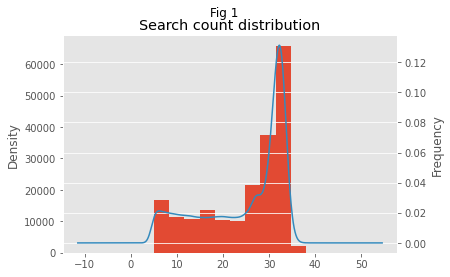

In [25]:
ax = search_counts.date_time.plot(kind='hist')
search_counts.date_time.plot(kind='kde', ax=ax, secondary_y=True)
plt.title('Search count distribution')
plt.suptitle('Fig 1')
plt.xlabel('Search count')
plt.ylabel('Frequency')
#plt.xticks(rotation=5)
plt.show()

In [36]:
df[['srch_id', 'visitor_location_country_id', 'date_time']]

,srch_id,visitor_location_country_id,date_time
0,1,187,2013-04-04 08:32:15
1,1,187,2013-04-04 08:32:15
2,1,187,2013-04-04 08:32:15
3,1,187,2013-04-04 08:32:15
4,1,187,2013-04-04 08:32:15
...,...,...,...
4958342,332785,219,2013-06-30 19:55:18
4958343,332785,219,2013-06-30 19:55:18
4958344,332785,219,2013-06-30 19:55:18
4958345,332785,219,2013-06-30 19:55:18


In [41]:
print ("Number of unique searches per country of visitor")
search_visitor_country = df[['srch_id', 'visitor_location_country_id']].groupby(['visitor_location_country_id']).srch_id.nunique()
search_visitor_country = pd.DataFrame(search_visitor_country)
search_visitor_country.describe()

Number of unique searches per country of visitor


,srch_id
count,210.000000
mean,951.404762
std,8065.894174
min,1.000000
25%,5.000000
50%,17.000000
75%,92.500000
max,114186.000000


In [43]:
search_location_country = df[['srch_id', 'srch_destination_id']].groupby(['srch_destination_id']).srch_id.nunique()
search_location_country = pd.DataFrame(search_location_country)
search_location_country.describe()

,srch_id
count,18127.000000
mean,11.021956
std,49.124948
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,2464.000000


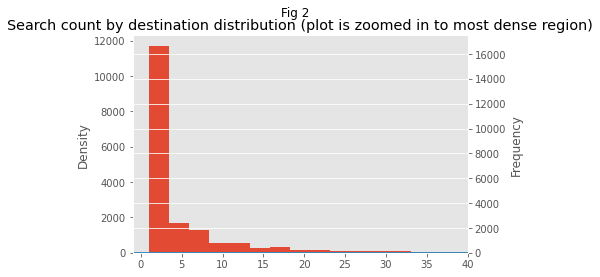

In [62]:
ax = search_location_country.srch_id.plot(kind='hist', bins=1000)
search_location_country.srch_id.plot(kind='kde', ax=ax, secondary_y=True)
plt.title('Search count by destination distribution (plot is zoomed in to most dense region)')
plt.suptitle('Fig 2')
plt.xlabel('Search count by destination')
plt.ylabel('Frequency')
plt.axis([-1, 40, 0, 17500])
#plt.xticks(rotation=5)
plt.show()

In [71]:
search_week_day = df[['srch_id', 'day_of_week_str']]
search_week_day

,srch_id,day_of_week_str
0,1,Thursday
1,1,Thursday
2,1,Thursday
3,1,Thursday
4,1,Thursday
...,...,...
4958342,332785,Sunday
4958343,332785,Sunday
4958344,332785,Sunday
4958345,332785,Sunday


In [91]:
print ("Searches by day of the week")
search_week_day = df[['srch_id', 'day_of_week_str']].groupby(['day_of_week_str']).srch_id.nunique()
search_week_day = pd.DataFrame(search_week_day)
search_week_day = search_week_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
search_week_day.reset_index(inplace=True)
search_week_day.rename(columns={"srch_id": "Searches"}, inplace=True)
search_week_day

Searches by day of the week


,day_of_week_str,Searches
0,Monday,31022
1,Tuesday,30972
2,Wednesday,31555
3,Thursday,30060
4,Friday,27475
5,Saturday,22137
6,Sunday,26574


In [90]:
print ("Searches with a booking by day of the week")
search_week_day_b = df_booked[['srch_id', 'day_of_week_str']].groupby(['day_of_week_str']).srch_id.nunique()
search_week_day_b = pd.DataFrame(search_week_day_b)
search_week_day_b = search_week_day_b.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
search_week_day_b.reset_index(inplace=True)
search_week_day_b.rename(columns={"srch_id": "Searches with a booking"}, inplace=True)
search_week_day_b

Searches with a booking by day of the week


,day_of_week_str,Searches with a booking
0,Monday,21314
1,Tuesday,21205
2,Wednesday,21939
3,Thursday,20949
4,Friday,19352
5,Saturday,15414
6,Sunday,18217


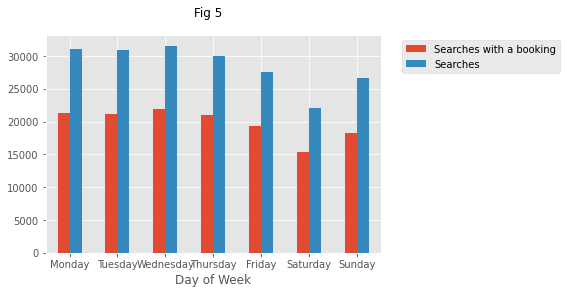

In [133]:
df_by_day_of_week = pd.merge(search_week_day_b, search_week_day, on='day_of_week_str')
df_by_day_of_week.plot.bar(x='day_of_week_str', logy=False)
plt.xticks(rotation=0)
plt.xlabel('Day of Week')
plt.suptitle('Fig 5')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [140]:
print ("Booking price by week day")
search_week_day_b_price = df_booked[['gross_bookings_usd', 'day_of_week_str']].groupby(['day_of_week_str']).mean()
# search_week_day_b = pd.DataFrame(search_week_day_b)
search_week_day_b_price = search_week_day_b_price.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
search_week_day_b_price.reset_index(inplace=True)
search_week_day_b_price.rename(columns={"gross_bookings_usd": "Bookings Gross USD"}, inplace=True)
search_week_day_b_price


Booking price by week day


,day_of_week_str,Bookings Gross USD
0,Monday,391.429635
1,Tuesday,390.944310
2,Wednesday,383.991769
3,Thursday,374.745753
4,Friday,373.401496
5,Saturday,388.568886
6,Sunday,402.614701


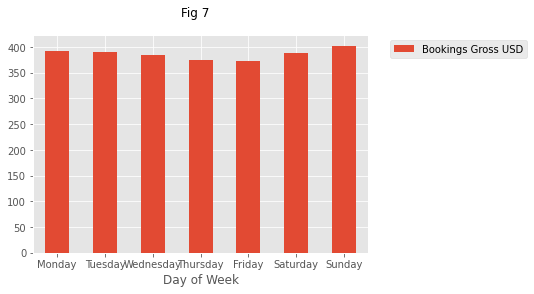

In [141]:
search_week_day_b_price.plot.bar(x='day_of_week_str', logy=False)
plt.xticks(rotation=0)
plt.xlabel('Day of Week')
plt.suptitle('Fig 7')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [100]:
print ("Searches by hour of day")
search_hour_of_day = df[['srch_id', 'hour_of_day']].groupby(['hour_of_day']).srch_id.nunique()
search_hour_of_day = pd.DataFrame(search_hour_of_day)
search_hour_of_day.reset_index(inplace=True)
search_hour_of_day.rename(columns={"srch_id": "Searches"}, inplace=True)
search_hour_of_day

Searches by hour of day


,hour_of_day,Searches
0,0,3341
1,1,2011
2,2,1442
3,3,1381
4,4,1971
5,5,3200
6,6,5306
7,7,7495
8,8,9111
9,9,10737


In [103]:
print ("Searches with a booking by hour of day")
search_hour_of_day_b = df_booked[['srch_id', 'hour_of_day']].groupby(['hour_of_day']).srch_id.nunique()
search_hour_of_day_b = pd.DataFrame(search_hour_of_day_b)
search_hour_of_day_b.reset_index(inplace=True)
search_hour_of_day_b.rename(columns={"srch_id": "Searches with a booking"}, inplace=True)
search_hour_of_day_b

Searches with a booking by hour of day


,hour_of_day,Searches with a booking
0,0,2239
1,1,1383
2,2,977
3,3,958
4,4,1418
5,5,2281
6,6,3818
7,7,5332
8,8,6509
9,9,7549


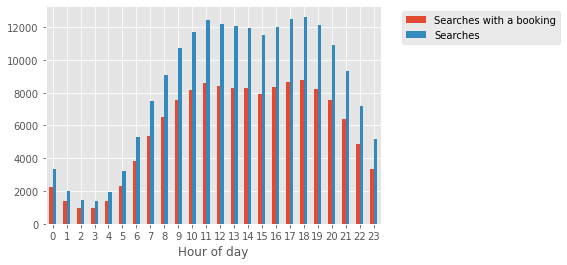

In [105]:
df_by_day_of_week = pd.merge(search_hour_of_day_b, search_hour_of_day, on='hour_of_day')
df_by_day_of_week.plot.bar(x='hour_of_day', logy=False)
plt.xticks(rotation=0)
plt.xlabel('Hour of day')
plt.suptitle('Fig 6')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [123]:
print ("Searches with a booking by month")
search_month = df_booked[['srch_id', 'month_str']].groupby(['month_str']).srch_id.nunique()
search_month = pd.DataFrame(search_month)
search_month = search_month.reindex(['November', 'December', 'January', 'February', 'March', 'April', 'May', 'June'])
search_month.reset_index(inplace=True)
search_month.rename(columns={"srch_id": "Searches with a booking"}, inplace=True)
search_month

Searches with a booking by month


,month_str,Searches with a booking
0,November,13971
1,December,13371
2,January,16011
3,February,16473
4,March,19426
5,April,17952
6,May,20078
7,June,21108


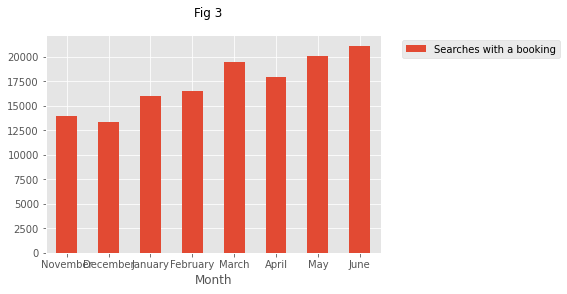

In [132]:
search_month.plot.bar(x='month_str', logy=False)
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.suptitle('Fig 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [126]:
df_temporal = df[['srch_id', 'search_date']].groupby('search_date').count()

In [110]:
df_temporal.tail(5)

,srch_id
search_date,
2013-06-26,29551
2013-06-27,24272
2013-06-28,23920
2013-06-29,17913
2013-06-30,21886


In [115]:
df_temporal.sort_values('srch_id')

,srch_id
search_date,
2012-12-24,10738
2012-12-25,10932
2012-12-01,10974
2012-11-03,11134
2012-12-15,11391
...,...
2013-06-18,28465
2013-06-25,28695
2013-06-24,28844


In [111]:
df_temporal.describe()

,srch_id
count,242.000000
mean,20489.037190
std,4243.287837
min,10738.000000
25%,17608.500000
50%,20555.500000
75%,23914.000000
max,29551.000000


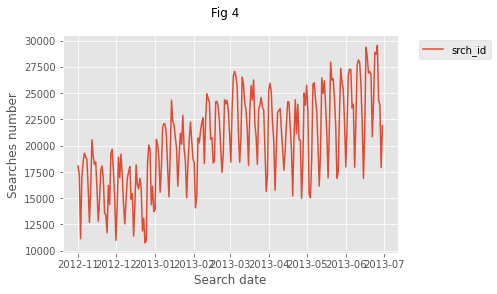

In [131]:
df_temporal.plot.line()
plt.xlabel('Search date')
plt.ylabel('Searches number')
plt.suptitle('Fig 4')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [197]:
def find_intergroup_property(df, mainprops, condprops, funcs):
    output_groups = {}
    for i, mainprop in enumerate(mainprops):
        condprop = condprops[i]
        func = funcs[i]
        propname = condprop + "_" + func
        try:
            main_index = df[df[mainprop] == 1].index.values[0]
        except:
            return output_groups
        if func == 'max_unique':
            cond_idx = df[condprop].idxmax()
            output_groups[propname] = int(main_index == cond_idx)
        elif func == 'max':
            cond_value = df[condprop].max()
            matching_index = df[df[condprop] == cond_value].index.values
            output_groups[propname] = int(main_index in matching_index)
        elif func == 'min_unique':
            cond_idx = df[condprop].idxmin()
            output_groups[propname] = int(main_index == cond_idx)
        elif func == 'min':
            cond_value = df[condprop].min()
            matching_index = df[df[condprop] == cond_value].index.values
            output_groups[propname] = int(main_index in matching_index)
        elif func == 'above_avg':
            mean = df[condprop].mean()
            matching_index = df[df[condprop] >= mean].index.values
            output_groups[propname] = int(main_index in matching_index)
        elif func == 'below_avg':
            mean = df[condprop].mean()
            matching_index = df[df[condprop] < mean].index.values
            output_groups[propname] = int(main_index in matching_index)
        elif func == 'bool':
            try:
                cond_idx = df[df[condprop] == 1].index.values[0]
                output_groups[propname] = int(main_index == cond_idx)
            except:
                None
    return output_groups

In [219]:
df_int = df[
    [
        'srch_id', 'promotion_flag', 'prop_review_score', 
        'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
        'price_usd', 'gross_bookings_usd', 'srch_query_affinity_score', 
        'booking_bool', 'click_bool'
    ]
]

df_affinity_int = df_affinity[
    [
        'srch_id', 'srch_query_affinity_score', 
        'booking_bool', 'click_bool'
    ]
]

In [202]:
booking_patterns = df_int.groupby('srch_id').apply(
    lambda x: find_intergroup_property(
        x, 
        ['booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool', 'booking_bool'], 
        ['prop_review_score', 'prop_review_score', 'promotion_flag', 'prop_location_score1', 'prop_location_score1', 'prop_location_score2', 'prop_location_score2', 'price_usd', 'price_usd', 'srch_query_affinity_score', 'srch_query_affinity_score', 'prop_brand_bool', 'prop_review_score', 'prop_review_score', 'prop_location_score1', 'prop_location_score1', 'prop_location_score2', 'prop_location_score2', 'price_usd', 'price_usd', 'srch_query_affinity_score', 'srch_query_affinity_score'], 
        ['max', 'min', 'bool', 'max', 'min', 'max', 'min', 'max', 'min', 'max', 'min', 'bool', 'above_avg', 'below_avg', 'above_avg', 'below_avg', 'above_avg', 'below_avg', 'above_avg', 'below_avg', 'above_avg', 'below_avg']
    )
)

In [220]:
booking_patterns_affinity = df_affinity_int.groupby('srch_id').apply(
    lambda x: find_intergroup_property(
        x, 
        ['booking_bool', 'booking_bool', 'booking_bool', 'booking_bool'], 
        ['srch_query_affinity_score', 'srch_query_affinity_score', 'srch_query_affinity_score', 'srch_query_affinity_score'], 
        ['max', 'min','above_avg', 'below_avg']
    )
)

In [206]:
booking_patterns_res = pd.DataFrame(booking_patterns)
booking_patterns_res.rename(columns={0: 'prop'}, inplace=True)
booking_patterns_res = booking_patterns_res['prop'].apply(pd.Series, dtype='bool')

In [226]:
booking_patterns_res.dropna(axis='rows', subset=['promotion_flag_bool'], inplace=False)

,prop_review_score_max,prop_review_score_min,promotion_flag_bool,prop_location_score1_max,prop_location_score1_min,prop_location_score2_max,prop_location_score2_min,price_usd_max,price_usd_min,srch_query_affinity_score_max,...,prop_review_score_above_avg,prop_review_score_below_avg,prop_location_score1_above_avg,prop_location_score1_below_avg,prop_location_score2_above_avg,prop_location_score2_below_avg,price_usd_above_avg,price_usd_below_avg,srch_query_affinity_score_above_avg,srch_query_affinity_score_below_avg
srch_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,True,False,False
21,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,True,False,False
25,False,False,False,True,False,False,False,False,False,False,...,True,False,True,False,True,False,False,True,False,False
28,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332774,True,False,False,False,True,False,True,False,False,False,...,True,False,False,True,False,True,False,True,False,False
332776,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,False,False,False
332781,False,False,False,False,True,True,True,False,False,True,...,True,False,False,True,True,False,True,False,True,False


In [221]:
booking_patterns_aff_res = pd.DataFrame(booking_patterns_affinity)
booking_patterns_aff_res.rename(columns={0: 'prop'}, inplace=True)
booking_patterns_aff_res = booking_patterns_aff_res['prop'].apply(pd.Series, dtype='bool')

In [214]:
booking_patterns_res.dropna(axis='rows', subset=['prop_review_score_max'], inplace=True)
total_bp = len(booking_patterns_res)
print(total_bp)

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_review_score_max'] == 1])
print("Number of booked hotels with the highest user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_review_score_min'] == 1])
print("Number of booked hotels with the minimum user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_review_score_above_avg'] == 1])
print("Number of booked hotels with an above average user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_review_score_below_avg'] == 1])
print("Number of booked hotels with a below average user review score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['promotion_flag_bool'] == 1])
print("Number of booked hotels with a promotion among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score1_max'] == 1])
print("Number of booked hotels with the maximum location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score1_min'] == 1])
print("Number of booked hotels with the minimum location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score1_above_avg'] == 1])
print("Number of booked hotels with an above average location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score1_below_avg'] == 1])
print("Number of booked hotels with a below average location score 1 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score2_max'] == 1])
print("Number of booked hotels with the maximum location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score2_min'] == 1])
print("Number of booked hotels with the minimum location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()


reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score2_above_avg'] == 1])
print("Number of booked hotels with an above average location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_location_score2_below_avg'] == 1])
print("Number of booked hotels with a below average location score 2 among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['price_usd_min'] == 1])
print("Number of booked hotels with the minimum USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['price_usd_max'] == 1])
print("Number of booked hotels with the maximum USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()



reduced_bp = len(booking_patterns_res[booking_patterns_res['price_usd_below_avg'] == 1])
print("Number of booked hotels with a below avg USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['price_usd_above_avg'] == 1])
print("Number of booked hotels with an above avg USD price among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_res[booking_patterns_res['prop_brand_bool_bool'] == 1])
print("Number of booked hotels being of a hotel brand")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()


138390
Number of booked hotels with the highest user review score among results
24764
17.894356528650913

Number of booked hotels with the minimum user review score among results
10234
7.3950429944360145

Number of booked hotels with an above average user review score among results
92631
66.93474962063732

Number of booked hotels with a below average user review score among results
45643
32.98142929402413

Number of booked hotels with a promotion among results
9229
6.668834453356457

Number of booked hotels with the maximum location score 1 among results
17853
12.900498590938653

Number of booked hotels with the minimum location score 1 among results
10872
7.856058963797963

Number of booked hotels with an above average location score 1 among results
89638
64.77202109979045

Number of booked hotels with a below average location score 1 among results
48752
35.22797890020955

Number of booked hotels with the maximum location score 2 among results
19229
13.894790085988873

Number of booke

In [223]:
booking_patterns_aff_res.dropna(axis='rows', subset=['srch_query_affinity_score_min'], inplace=True)
booking_patterns_aff_res

,srch_query_affinity_score_max,srch_query_affinity_score_min,srch_query_affinity_score_above_avg,srch_query_affinity_score_below_avg
srch_id,,,,
66,False,False,True,False
74,False,False,True,False
82,False,False,True,False
165,True,False,True,False
225,False,False,True,False
...,...,...,...,...
332671,False,False,True,False
332677,False,False,False,True
332712,False,False,True,False


In [224]:
total_bp = len(booking_patterns_aff_res)
reduced_bp = len(booking_patterns_aff_res[booking_patterns_aff_res['srch_query_affinity_score_min'] == 1])
print("Number of booked hotels with the minimum affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_aff_res[booking_patterns_aff_res['srch_query_affinity_score_max'] == 1])
print("Number of booked hotels with the maximum affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()


reduced_bp = len(booking_patterns_aff_res[booking_patterns_aff_res['srch_query_affinity_score_below_avg'] == 1])
print("Number of booked hotels with a below avg affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

reduced_bp = len(booking_patterns_aff_res[booking_patterns_aff_res['srch_query_affinity_score_above_avg'] == 1])
print("Number of booked hotels with an above avg affinity score among results")
print(reduced_bp)
print(reduced_bp/total_bp * 100)
print()

Number of booked hotels with the minimum affinity score among results
199
1.8282039503904457

Number of booked hotels with the maximum affinity score among results
2169
19.9265043638034

Number of booked hotels with a below avg affinity score among results
2228
20.46853468075333

Number of booked hotels with an above avg affinity score among results
8657
79.53146531924668



In [156]:
df[df['srch_id'] == 332785][['srch_id', 'booking_bool', 'prop_review_score']]

,srch_id,booking_bool,prop_review_score
4958341,332785,0,1.0
4958342,332785,0,4.0
4958343,332785,0,4.0
4958344,332785,0,3.5
4958345,332785,1,5.0
4958346,332785,0,2.5


# Paper

## Introduction

## Dataset

In order to predict the likelihood of users to book an hotel which follows the characteristics that they are showing, we must first look into the data. In our training set we have two key features for each search: the hotels which the user booked and clicked. The latter directly represents the decision of the user or their interest related to their query. Hence, we performed an exploratory data analysis around these two key features in order to try to find patterns or engineer features that would help our methods to perform better.

It is important to mention that the position feature in the dataset does not neccesarily reflect the real position of the search. Since it could have been randomly changed to avoid biass on prediction. This is stated in the original kaggle competition.

### Raw features and missing data

### Searches Analysis

We found that in the training set there are 199795 searches during 242 days spanning from 2012-11-01 until 2013-06-30. Searches have a minimum of 5 results and a maximum of 38 results. The mean of results per search is 24.81 with an standard deviation of 9.11. As seen on Fig 1, most of the searches output more than 29 results. All searched had at least one click given by the user among the results. However, not all the searches had a booking. A total of 138390 (69.26%) searches in the training set resulted in a booking. We found that for every search there is no more than one booking. (how many clicks in average?)

**Geographic Analysis**: Visitors countries are variate. A total of 210 countries are found. The world has a total of 195 countries. Hence, we hiphotesize that Expedia maybe subdivides big countries by region. The maximum number of searches in a country is 114186. The mininum number of searches is 1. Since countries are mapped as IDs we are not able to recognize which are these specific countries. On the other hand, visitors searched for 18127 different destinations. The minimum nummber of times a destination was searched is 1 and the maximum is 2464. However, most destinations (75%) where searched only 6 times. The latter hinted us that destinations searches are very variant. This can be further seen on Fig 2. 

**Temporal Analysis**: In average, 20489 searches are done per day with an standard deviation of 4243. The day of the least amount of searches with a booking is Christmas eve (2012-12-24) with 10738 bookings, followed by Christmas (2012-12-25) with 10932 bookings. In general December is the month with the least amount of searches and June the one with the most amount of searches. However, the latter could be due to the growth of the platform instead of a user behavioural pattern. This can be seen in Figure 3. A more complete picture of the users activity pattern can be seen on Figure 4. In here we can clearly see a cyclic behaviour of searches which goes up and down along the days. To further analyse this we performed a week day and hour-by-hour analysis. Figure 5 shows that weekends are the days in which the least amount of bookings and searches occur. Being Wednesday the day with the most amount of searches and bookings with 31555 searches and 21939 bookings respectively. The proportion of searches and bookings does not seems to be affected by the day of the week in which the search is being done. On the other hand, Figure 6 shows an hour-by-hour analysis. Between 9AM and 9PM is the peak of activity of users. However, once again, there is not a difference in proportions between bookings and searches counts. The latter hints us that booking proportions is not temporaly dependant. Finally, as Figure 7 shows, we found that on Sunday the Gross Booking price in USD is the highest ($402.61). Meanwhile, Fridays is the day with the lowest Gross Booking Price in average at 373.40.

### Users booking and clicking patterns
We hypothesize that some features of hotels affected the rate in which users would book or click that hotel. To test this we first grouped searches which ended up in a booking and determine if the booked hotel features were different from the others hotel features. For example, for each search we computed if the booked hotel user review score was the maximum or minimum score among the search results. In addition to this, we tried to determine if the booked hotel had an above average metric among the other hotels of the search. Table 1 summarizes the results of our analysis by showing.  

| **Feature**                                                 | **Higuest value booking rate** | **Lowest value booking rate** | **Above average value booking rate** |
|-------------------------------------------------------------|--------------------------------|--------------------------------|--------------------------------|
| **User review score**                                       | 16.95                          | 6.41                           | 66.93                          |
| **Location Score #1**                                       | 10.87                          | 6.66                           | 64.77                          |
| **Location Score #2**                                       | 12.39                          | 3.94                           | 63.13                          |
| **USD Price**                                               | 7.34                           | 2.17                           | 32.45                          |
| **Query Affinity Score** (only available on 13600 searches) | 19.93                          | 1.82                           | 79.53                          |
| **Promotion Flag**                                          | 7.86                           | -                              |                                |
| **Hotel Major Brand**                                       | 4.73                           | -                              |                                |


Table 1 shows how some features of hotels do affect the booking rate of hotels. For instance, the query affinity score seems to be the most relevant feature. Almost 20\% of the hotels booked had the maximum affinity score for the query. Furthermore, the maximum user review score also appears with a 16.95\% of hotels booked. On the counter part, when analyzing the minimum values among the search, the booking rate is reduced. For instance, in the affinity score the booking rate goes down to 1.82\% for the hotels with the lowest score. The latter can be further supported by the "Above average" analysis. In which we can see that for example, 32.45\% of the hotels booked had a price above the average. Which confirms us that users tend to choose cheaper options over expensive ones. This tendency of booking given "better" measures can be seen accross all features. Finally, promotion flag and hotel major brand flag does not seem to be a major determinant on the booking rate. 

Furthermore, we replicated the analysis for clicked hotels...

## Related Work


## Methodology


## Results


## Conclusions